In [1]:
using DataFrames, CSV
using Statistics
using PlotlyJS
using LaTeXStrings

In [10]:
function read_results_as_df(dir, feature_name; filter_word=nothing)
    df = DataFrame(Symbol("Node Features") => String[], Symbol("Solution Size") => Real[], :Runtime => Real[])
    if !isdir(dir)
        return df
    end
    files = readdir(dir)
    filter!(x -> endswith(x, ".csv"), files)
    if !isnothing(filter_word)
        filter!(x -> contains(x, filter_word), files)
    else
        filter!(x -> !contains(x, filter_word), files)
    end
    for file in files
        df_tmp = DataFrame(CSV.File(joinpath(dir,file)))
        push!(df, (   
                feature_name,
                mean(df_tmp.Avg),
                mean(df_tmp.Runtime)
                )
            )
    end
    df
end

read_results_as_df (generic function with 1 method)

In [43]:
df_d_S = DataFrame(CSV.File(joinpath("V200_045-055", "results-d_S.csv")))
mean_ds = mean(df_d_S.Avg)

13.73

In [52]:
df_d_S_2 = DataFrame(CSV.File(joinpath("V200_045-055", "results-d_S-2.csv")))
mean_ds_2 = mean(df_d_S_2.Avg)

13.89

In [61]:
df_d_S_3 = DataFrame(CSV.File(joinpath("V200_045-055", "results-d_S-3.csv")))
mean_ds_3 = mean(df_d_S_3.Avg)

14.0

In [7]:
function get_features(dir, depth=1; e1e2=false, filter_word=nothing)
    single_features = [
        ("$dir/Degree/$depth/", "D"),
        ("$dir/EgoNet1/$depth/", "E1"),
        ("$dir/Node2Vec_2_4/$depth/", "N2V"),
        ("$dir/Struct2Vec/$depth/", "S2V"),
    ]
    
    combined_features = [
        ("$dir/Degree-Node2Vec_2_4/$depth/", "D+N2V"),
        ("$dir/Degree-Struct2Vec/$depth/", "D+S2V"),
        ("$dir/EgoNet1-Node2Vec_2_4/$depth/", "E1+N2V"),
        ("$dir/EgoNet1-Struct2Vec/$depth/", "E1+S2V"),
        ("$dir/Node2Vec_2_4-Struct2Vec/$depth/", "N2V+S2V"),
    ]
    
    if e1e2
        push!(combined_features, ("$dir/EgoNet1-EgoNet2/$depth/", "E1+E2"))
    end

    dfs_single = [read_results_as_df(dir, feature_name; filter_word) for (dir, feature_name) in single_features]
    dfs_combined = [read_results_as_df(dir, feature_name; filter_word) for (dir, feature_name) in combined_features]
    return (; single=reduce(vcat, dfs_single), combined=reduce(vcat, dfs_combined))
end

get_features (generic function with 2 methods)

In [16]:
add_line(p, y_val, len) = add_shape!(p, line(
    x0=-1, y0=y_val,
    x1=len, y1=y_val,
    line=attr(color="Black", width=1, dash="dash")
))

add_line (generic function with 1 method)

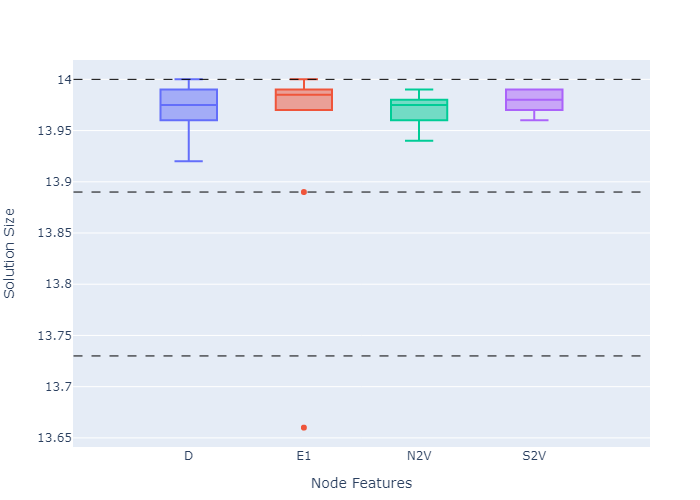

In [63]:
p = plot(dfs_single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
add_line(p, mean_ds, 4)
add_line(p, mean_ds_2, 4)
add_line(p, mean_ds_3, 4)
p

In [39]:
dfs_combined = [read_results_as_df(dir, feature_name) for (dir, feature_name) in combined_features]
dfs_combined = reduce(vcat, dfs_combined)
;

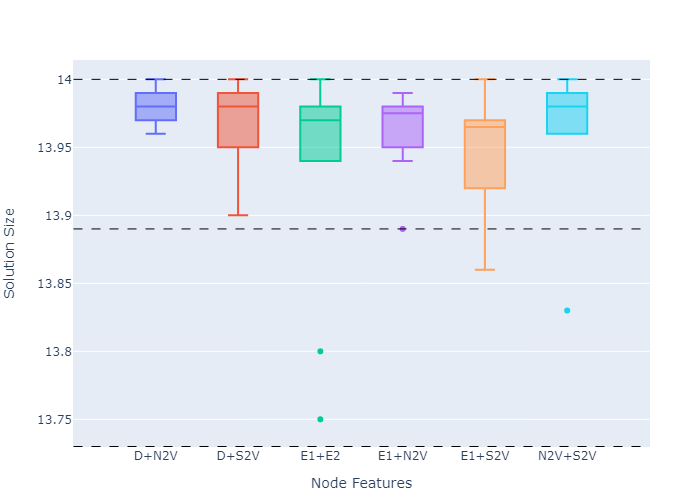

In [62]:
p = plot(dfs_combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
    add_line(p, mean_ds, 6)
    add_line(p, mean_ds_2, 6)
    add_line(p, mean_ds_3, 6)
p

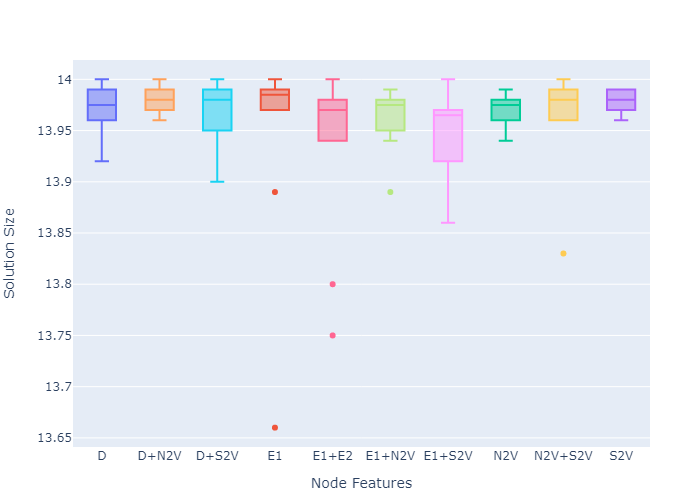

In [44]:
features = get_features("V200_045-055")
p = plot(vcat(features.single, features.combined), x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
    # add_line(p, mean_ds, 10)
    # add_line(p, mean_ds_2, 10)
    # add_line(p, mean_ds_3, 10)
savefig(p, "V200-045-055.pdf", width=1000, height=500)
p

In [21]:
features = get_features("V200_045-055")
single = features.single
gdf = groupby(single, Symbol("Node Features"))
result = []
for key in keys(gdf)
    m = mean(gdf[key][!, Symbol("Solution Size")])
    println("$(key[1]): $m")
    push!(result, (key, m))
end
sort!(result; by=last, rev=true)
println(convert(Tuple, result[1]))

D: 13.974
E1: 13.942999999999998
N2V: 13.970999999999998
S2V: 13.978
(GroupKey: (var"Node Features" = "S2V",), 13.978)


In [67]:
single_features = [
    ("V400_045-055/Degree/1/", "D"),
    ("V400_045-055/EgoNet1/1/", "E1"),
    ("V400_045-055/Node2Vec_2_4/1/", "N2V"),
    ("V400_045-055/Struct2Vec/1/", "S2V"),
]

combined_features = [
    ("V400_045-055/Degree-Node2Vec_2_4/1/", "D+N2V"),
    ("V400_045-055/Degree-Struct2Vec/1/", "D+S2V"),
    ("V400_045-055/EgoNet1-EgoNet2/1/", "E1+E2"),
    ("V400_045-055/EgoNet1-Node2Vec_2_4/1/", "E1+N2V"),
    ("V400_045-055/EgoNet1-Struct2Vec/1/", "E1+S2V"),
    ("V400_045-055/Node2Vec_2_4-Struct2Vec/1/", "N2V+S2V"),
]
;

dfs_single = [read_results_as_df(dir, feature_name) for (dir, feature_name) in single_features]
dfs_single = reduce(vcat, dfs_single)
dfs_combined = [read_results_as_df(dir, feature_name) for (dir, feature_name) in combined_features]
dfs_combined = reduce(vcat, dfs_combined)
;


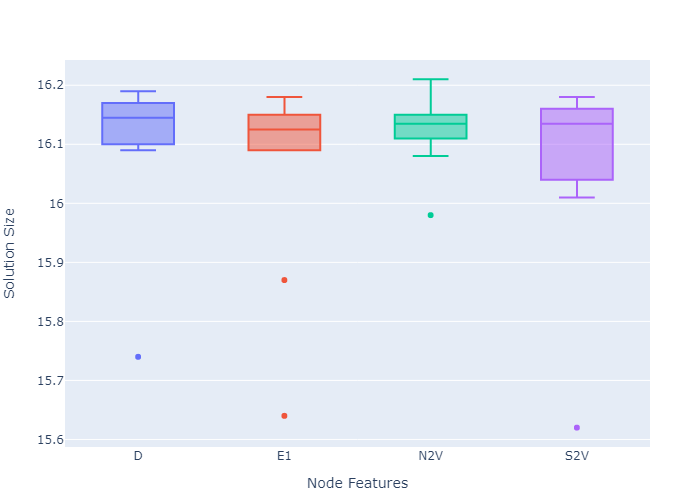

In [68]:
p = plot(dfs_single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
p

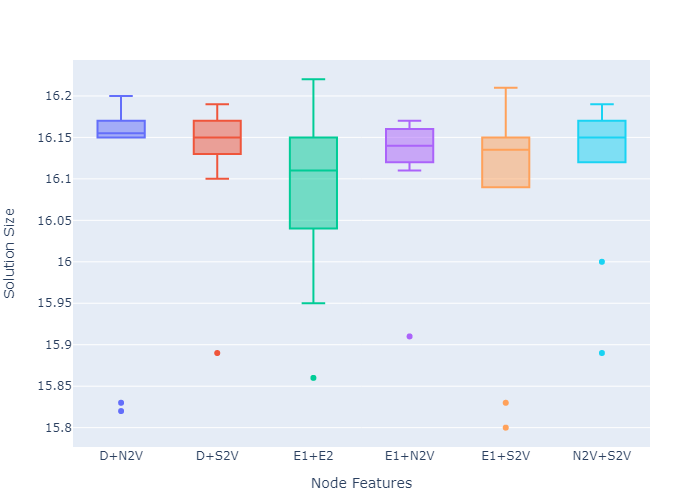

In [69]:
p = plot(dfs_combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
p

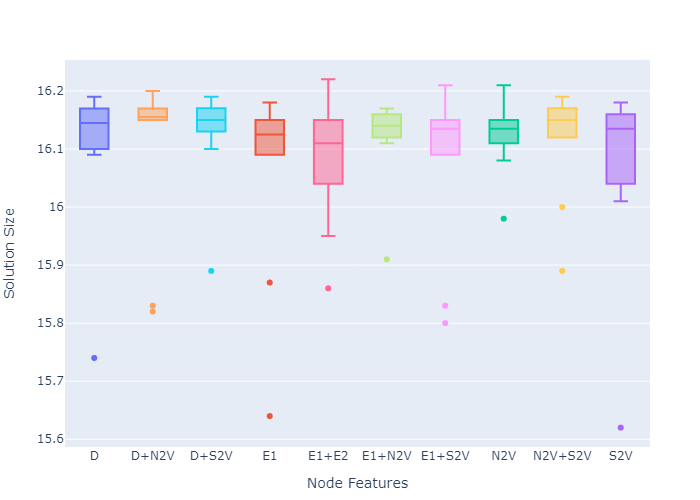

In [70]:
p = plot(vcat(dfs_single, dfs_combined), x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
p

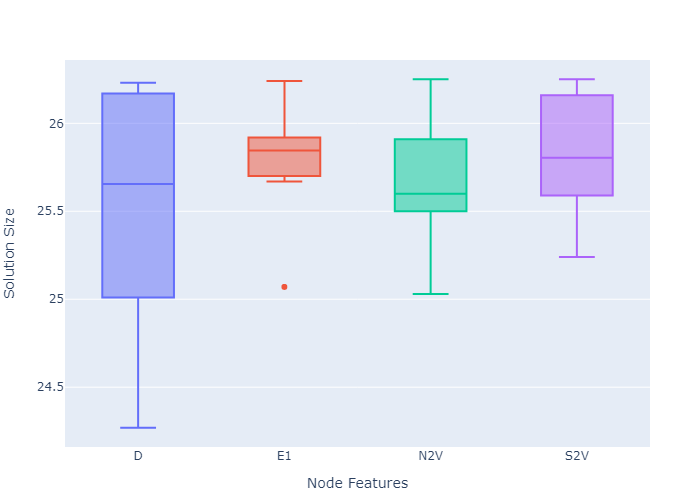

In [37]:
features = get_features("V400_06-07")
p1 = plot(features.single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))



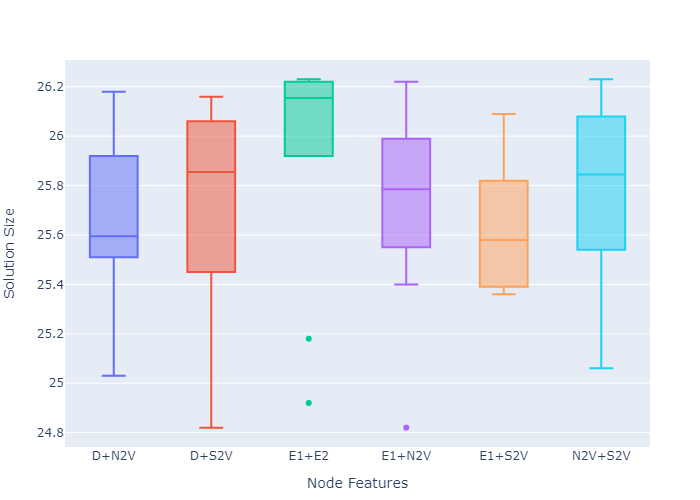

In [12]:
p2 = plot(features.combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))

In [14]:
df_d_S = DataFrame(CSV.File(joinpath("V400_06-07", "results-d_S.csv")))
mean_ds = mean(df_d_S.Avg)

25.770000000000003

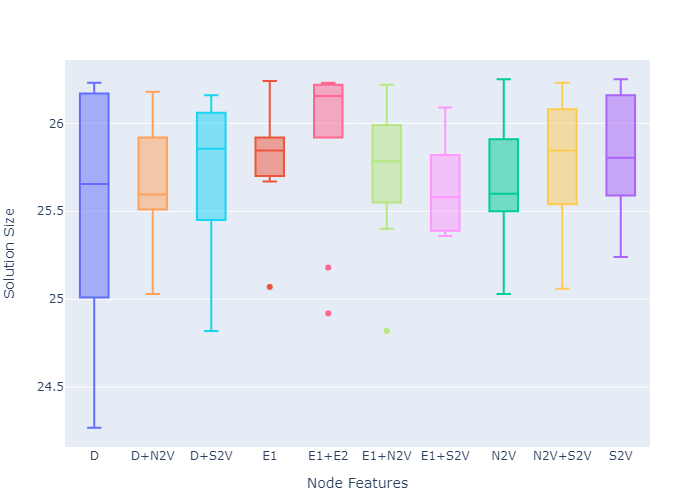

In [38]:
p3 = plot([features.single; features.combined], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))
# add_line(p3, mean_ds, 10)
p3

In [40]:
features = get_features("V450-082-0825_k20")
combined = filter(Symbol("Node Features") => !=("E1+E2"), features.combined)
;

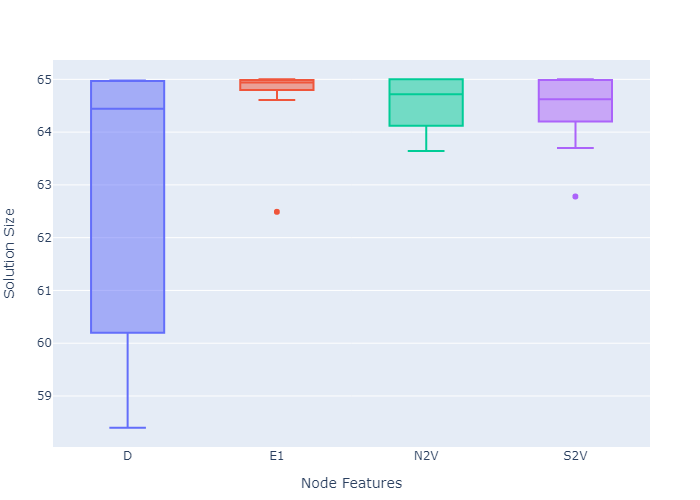

In [18]:
p1 = plot(features.single, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))


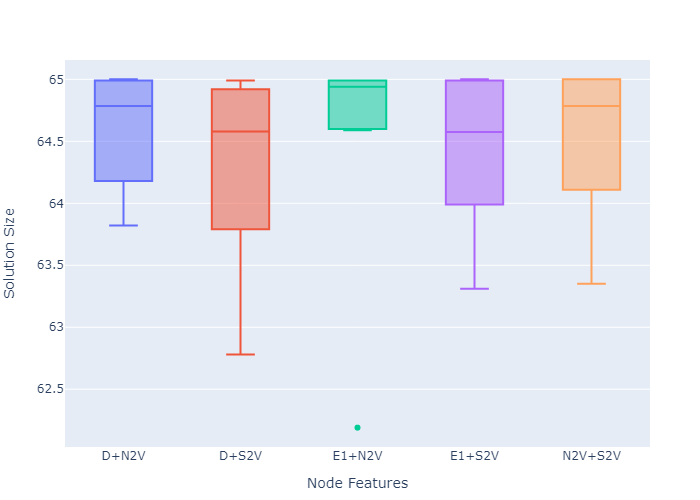

In [19]:
p2 = plot(combined, x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false
    ))

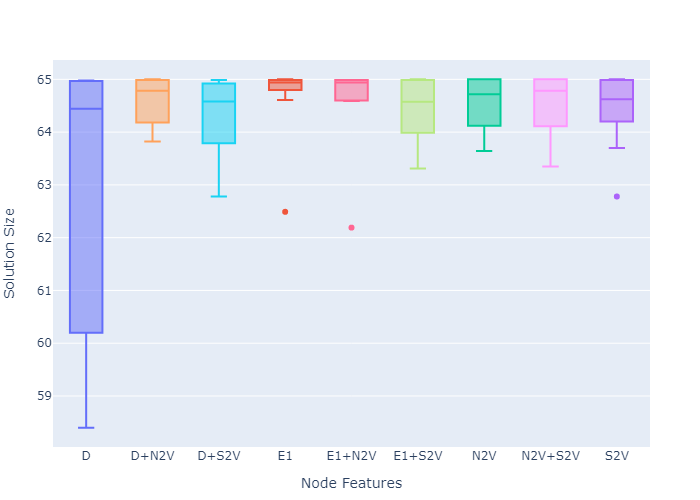

In [42]:
p3 = plot([features.single; combined], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false,
    ))
savefig(p3, "V450-082-0825.pdf", width=1000, height=500)
p3

In [7]:
function plot_features(features, filename)
    p = plot([features.single; features.combined], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false,
        font=attr(size=17),
    ))
    savefig(p, "$filename.pdf", width=1000, height=350)
    p
end

plot_features (generic function with 1 method)

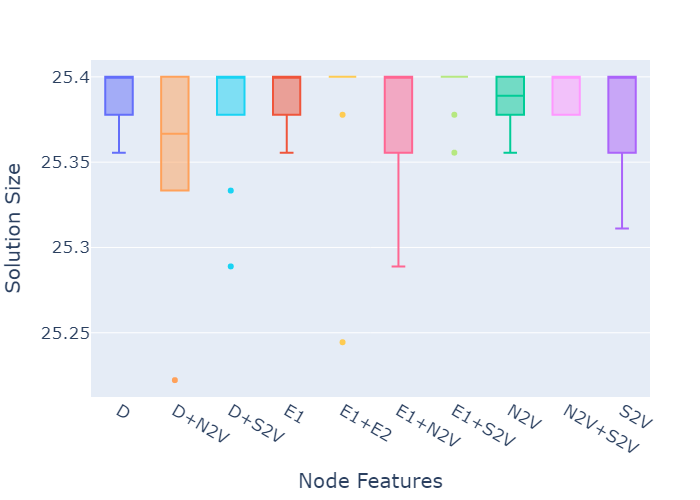

In [8]:
features = get_features("V200_048-052_brock200_2"; e1e2=true)
plot_features(features, "V200-048-052-random")

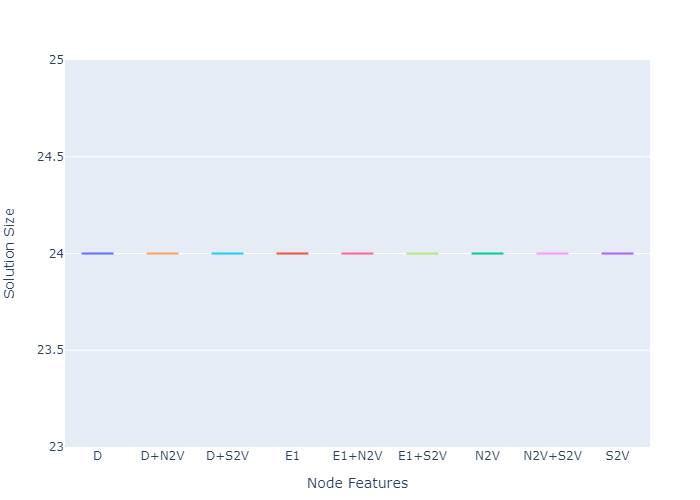

In [17]:
features = get_features("V200_048-052_brock200_2"; benchmark=true)
p = plot([features.single; features.combined], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Node Features"), 
    Layout(
        showlegend=false,
    ))
savefig(p, "V200-048-052-benchmark.pdf", width=1000, height=500)
p

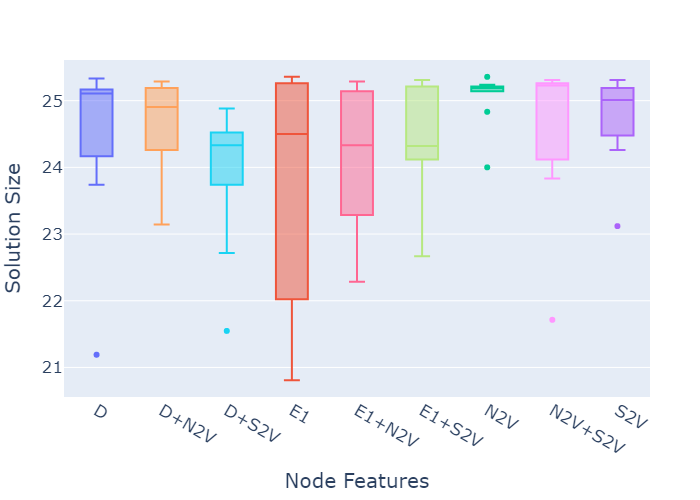

In [9]:
features = get_features("V400_074-076_brock400")
plot_features(features, "V400-074-076-random")

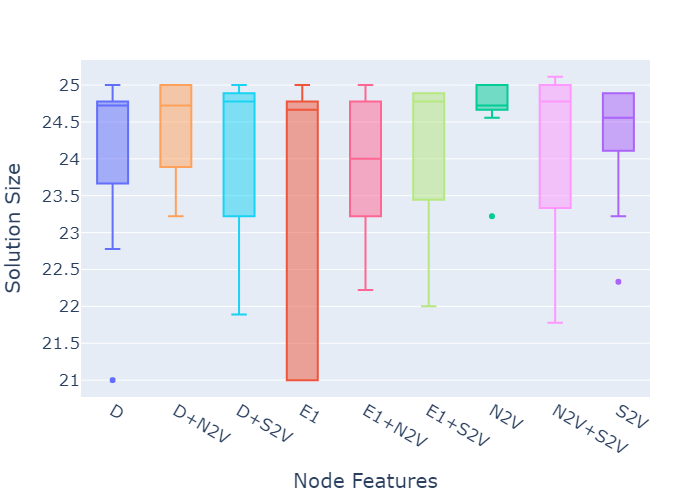

In [10]:
features = get_features("V400_074-076_brock400"; benchmark=true)
plot_features(features, "V400-074-076-benchmark")

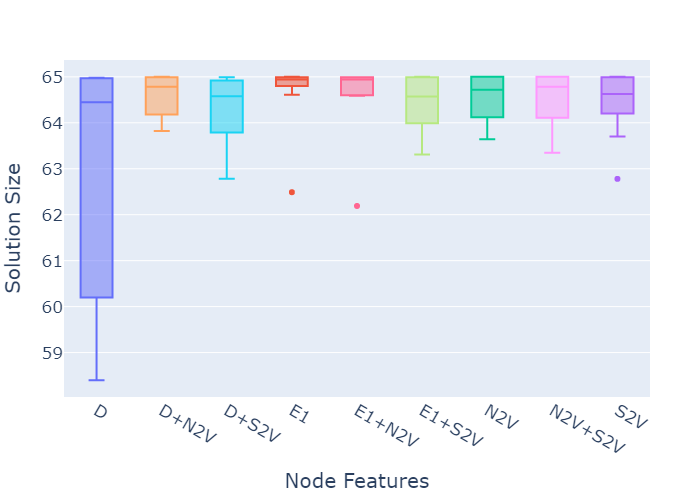

In [11]:
features = get_features("V450-082-0825_k20")
plot_features(features, "V450-082-0825-random")

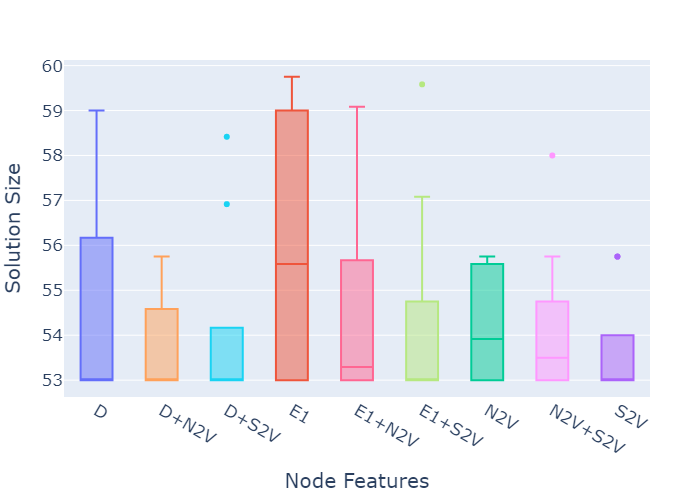

In [12]:
features = get_features("V450-082-0825_k20"; benchmark=true)
plot_features(features, "V450-082-0825-benchmark")

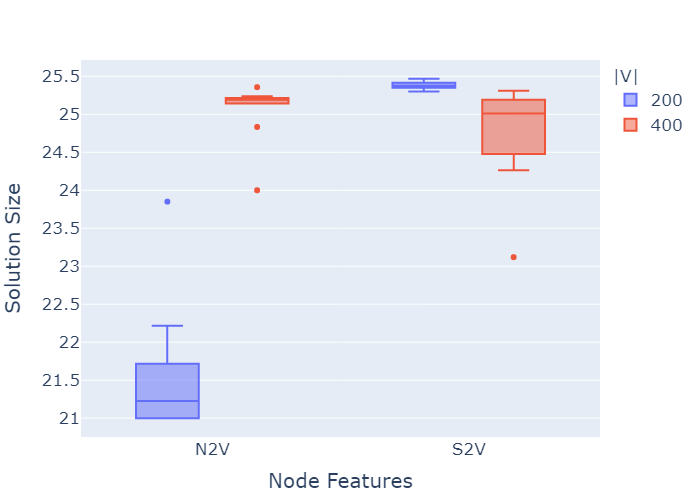

In [25]:
features_1 = get_features("V200_074-076", 1; benchmark=true).single
# features_1[!, Symbol("|V|")] = 200
features_2 = get_features("V400_074-076_brock400").single
N2V = filter(Symbol("Node Features") => .==("N2V"), features_2)
S2V = filter(Symbol("Node Features") => .==("S2V"), features_2)
features_2 = vcat(N2V, S2V)
features_1[!, Symbol("|V|")] .= "200"
features_2[!, Symbol("|V|")] .= "400"




p = plot([features_1; features_2], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("|V|"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("|V|")
    ))
savefig(p, "generalization-1.pdf", width=500, height=350)
p


In [8]:
combine(df) = vcat(df.single, df.combined)

combine (generic function with 1 method)

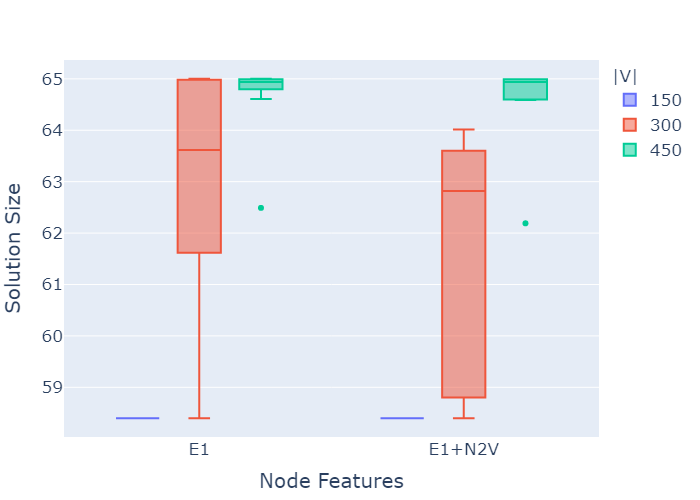

In [24]:
features_1 = combine(get_features("V150_082-0825", 1))
features_2 = combine(get_features("V300_082-0825", 1))
features_3 = combine(get_features("V450-082-0825_k20", 1))
filter!(Symbol("Node Features") => !.==("N2V") , features_3)
filter!(Symbol("Node Features") => !.==("S2V") , features_3)
filter!(Symbol("Node Features") => !.==("D") , features_3)
filter!(Symbol("Node Features") => !.==("D+N2V") , features_3)
filter!(Symbol("Node Features") => !.==("D+S2V") , features_3)
filter!(Symbol("Node Features") => !.==("N2V+S2V") , features_3)
filter!(Symbol("Node Features") => !.==("E1+S2V") , features_3)
features_1[!, Symbol("|V|")] .= "150"
features_2[!, Symbol("|V|")] .= "300"
features_3[!, Symbol("|V|")] .= "450"
p = plot([features_1; features_2; features_3], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("|V|"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("|V|")
    ))
savefig(p, "generalization-2.pdf", width=500, height=350)
p


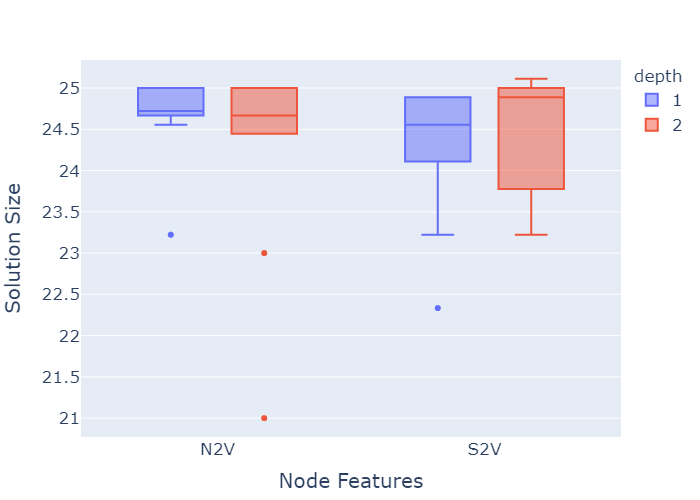

In [32]:
features_1 = get_features("V400_074-076_brock400", 1; benchmark=true).single
features_2 = get_features("V400_d2", 2; benchmark=true).single
N2V = filter(Symbol("Node Features") => .==("N2V"), features_1)
S2V = filter(Symbol("Node Features") => .==("S2V"), features_1)
features_1 = [N2V; S2V]
features_1[!, Symbol("depth")] .= "1"
features_2[!, Symbol("depth")] .= "2"
p = plot([features_1; features_2], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("depth"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("depth")
    ))
    savefig(p, "lookahead-depth-1.pdf", width=500, height=350)
    p

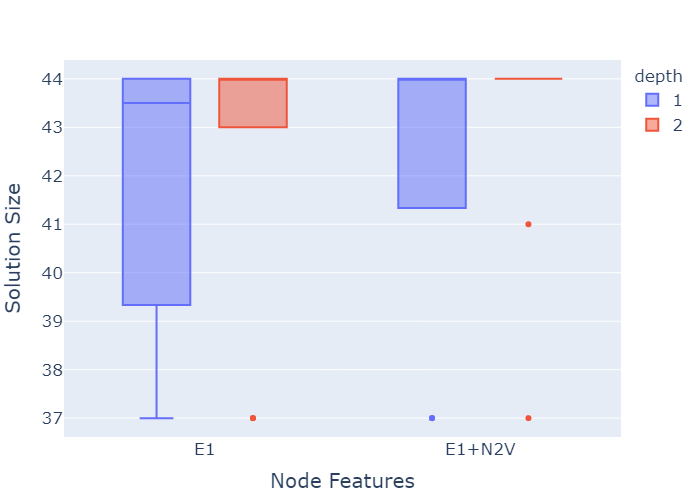

In [11]:
features_1 = get_features("V250-088-092", 1; benchmark=true)
features_2 = get_features("V250-0895-d2", 2; benchmark=true)
features_1 = [features_1.single; features_1.combined]
features_2 = [features_2.single; features_2.combined]
features_1[!, Symbol("depth")] .= "1"
features_2[!, Symbol("depth")] .= "2"
p = plot([features_1; features_2], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("depth"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("depth")
    ))
    savefig(p, "lookahead-depth-2.pdf", width=500, height=350)
    p

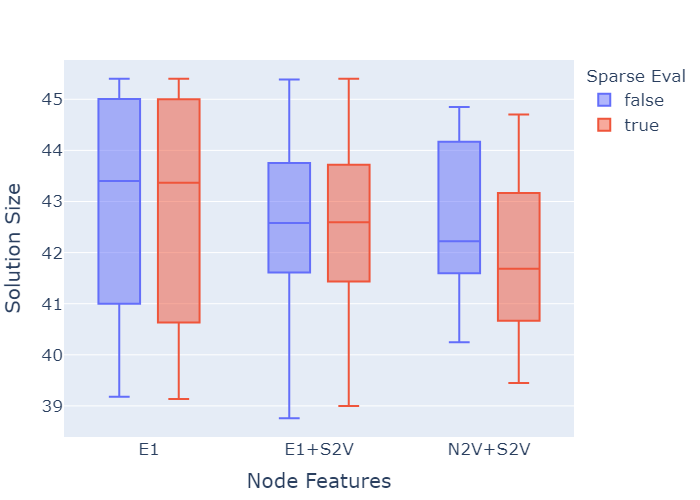

In [24]:
features_1 = get_features("V250_C250_benchmark", 2; filter_word="benchmark")
features_2 = get_features("V250_C250_benchmark", 2; filter_word="sparse")
features_1 = [features_1.single; features_1.combined]
features_2 = [features_2.single; features_2.combined]
features_1[!, Symbol("Sparse Eval")] .= "false"
features_2[!, Symbol("Sparse Eval")] .= "true"
# features_1 = [features_1.single; features_1.combined]
# features_2 = [features_2.single; features_2.combined]
# features_1[!, Symbol("depth")] .= "1"
# features_2[!, Symbol("depth")] .= "2"
p = plot([features_1; features_2], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Sparse Eval"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("Sparse Eval")
    ))
    savefig(p, "sparse-eval-1-size.pdf", width=500, height=350)
    p

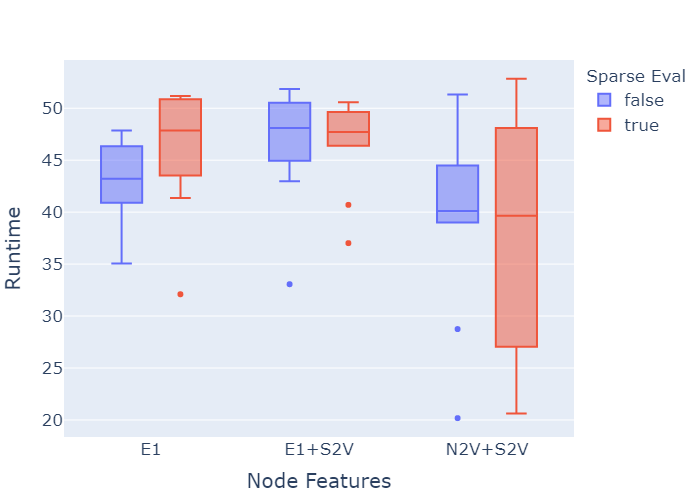

In [19]:
p = plot([features_1; features_2], x=Symbol("Node Features"), y=Symbol("Runtime"), kind="box", color=Symbol("Sparse Eval"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("Sparse Eval")
    ))
    savefig(p, "sparse-eval-1-runtime.pdf", width=500, height=350)
    p

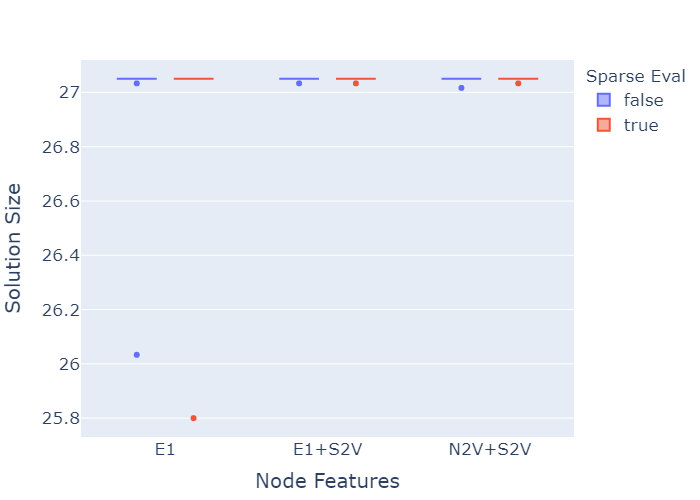

In [22]:
features_1 = get_features("p-hat-300-2", 2; filter_word="benchmark")
features_2 = get_features("p-hat-300-2", 2; filter_word="sparse")
features_1 = [features_1.single; features_1.combined]
features_2 = [features_2.single; features_2.combined]
features_1[!, Symbol("Sparse Eval")] .= "false"
features_2[!, Symbol("Sparse Eval")] .= "true"
# features_1 = [features_1.single; features_1.combined]
# features_2 = [features_2.single; features_2.combined]
# features_1[!, Symbol("depth")] .= "1"
# features_2[!, Symbol("depth")] .= "2"
p = plot([features_1; features_2], x=Symbol("Node Features"), y=Symbol("Solution Size"), kind="box", color=Symbol("Sparse Eval"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("Sparse Eval")
    ))
    savefig(p, "sparse-eval-2-size.pdf", width=500, height=350)
    p

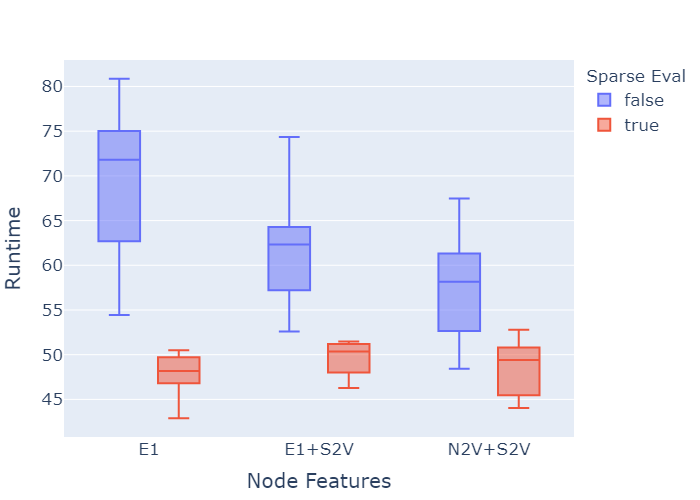

In [23]:
p = plot([features_1; features_2], x=Symbol("Node Features"), y=Symbol("Runtime"), kind="box", color=Symbol("Sparse Eval"),
    Layout(
        # showlegend=false,
        boxmode="group",
        font=attr(size=17),
        group=Symbol("Sparse Eval")
    ))
    savefig(p, "sparse-eval-2-runtime.pdf", width=500, height=350)
    p